In [2]:
import urllib3, json, base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

- 여러가지 객체 검출

In [3]:
with open('etriaikey.txt') as f:
    ai_key = f.read()

- 하나의 이미지 검출

In [4]:
img_file = '사진/공원.jpg'
img_type = img_file.split('.')[-1]
img_type

'jpg'

In [5]:
# JFIF 타입은 JPG로 변경
img_type = 'jpg' if img_type == 'jfif' else img_type

In [6]:
with open(img_file, "rb") as file:
    img_contents = base64.b64encode(file.read()).decode("utf8")

In [7]:
request_json = {
    "access_key": ai_key,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
}

In [8]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [9]:
response.status

200

In [12]:
result = json.loads(response.data)
obj_list = result['return_object']['data']

In [16]:
len(ai_key)

36

- 시각화

In [13]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

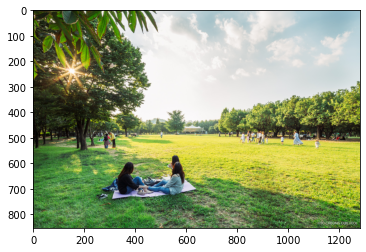

In [19]:
img = Image.open(img_file)
plt.imshow(img)

In [20]:
draw = ImageDraw.Draw(img)
for obj in obj_list:
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)
    draw.text((x+10, y-10), name, font=ImageFont.truetype('malgun.ttf', 20), fill=(255,0,0))

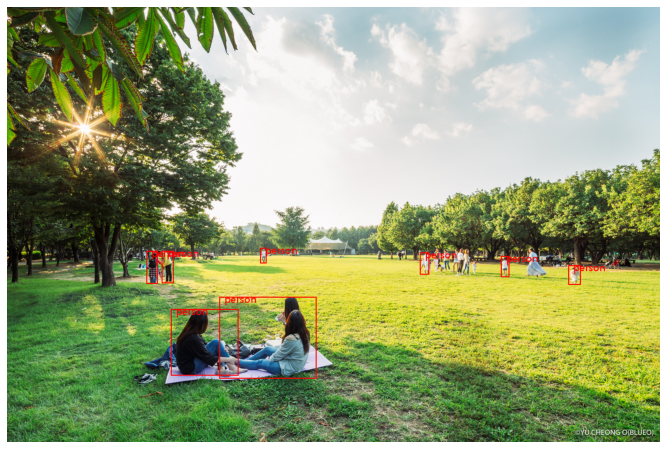

In [21]:
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.show()

- 여러개의 그림에서 객체 검출하기

In [26]:
from glob import glob
glob('사진/*jpg')

['사진\\dog.jpg', '사진\\공원.jpg', '사진\\동물원.jpg']

In [27]:
# 한글 파일 변환
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

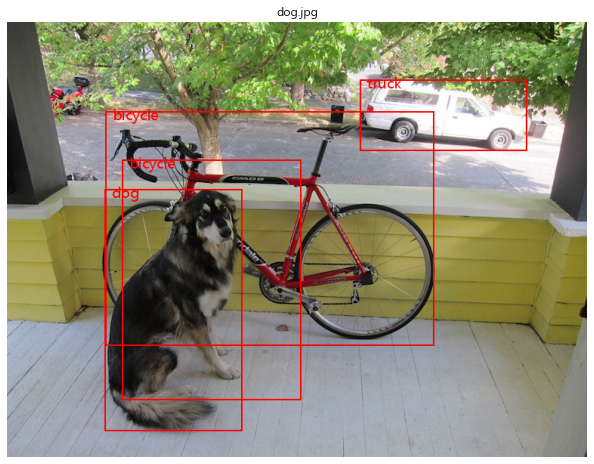

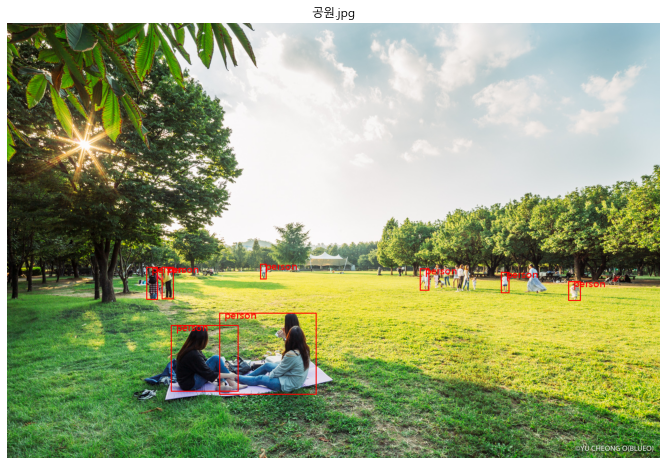

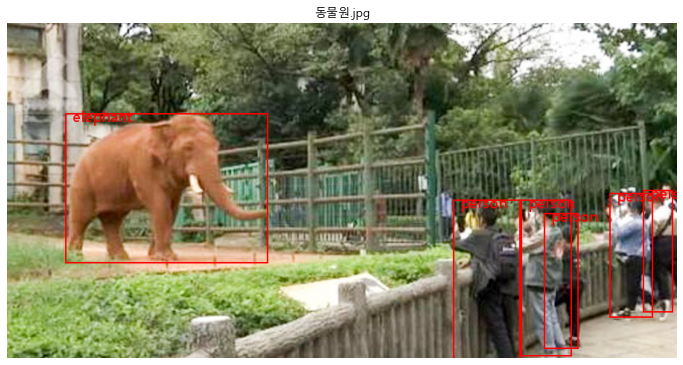

In [28]:
# http = urllib3.PoolManager()              # 프로그램 안에서 한번만 실행하면 됨
for img_file in glob('사진/*jpg'):
    img_type = img_file.split('.')[-1]
    img_type = 'jpg' if img_type == 'jfif' else img_type
    with open(img_file, "rb") as file:
        img_contents = base64.b64encode(file.read()).decode("utf8")
    
    request_json = {
        "access_key": ai_key,
        "argument": {
            "type": img_type,
            "file": img_contents
         }
    }

    response = http.request(
    "POST",
        openApiURL,
        headers={"Content-Type": "application/json; charset=UTF-8"},
        body=json.dumps(request_json)
    )
    if response.status != 200:
        continue

    result = json.loads(response.data)
    obj_list = result['return_object']['data']  
    img = Image.open(img_file)
    draw = ImageDraw.Draw(img)
    for obj in obj_list:
       name = obj['class']
       x = int(obj['x'])
       y = int(obj['y'])
       w = int(obj['width'])
       h = int(obj['height'])
       draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)
       draw.text((x+10, y-10), name, font=ImageFont.truetype('malgun.ttf', 20), fill=(255,0,0))
    
    plt.figure(figsize=(12,8))
    plt.imshow(img)
    plt.axis('off'), plt.title(img_file.split('\\')[-1])
    plt.show()